In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned_retail_data.csv")

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df[['Ratings','Shipping_Method','Payment_Method','Order_Status','Feedback']].head()

,Ratings,Shipping_Method,Payment_Method,Order_Status,Feedback
0,5.0,Same-Day,Debit Card,Shipped,Excellent
1,4.0,Standard,Credit Card,Processing,Excellent
2,2.0,Same-Day,Credit Card,Processing,Average
3,4.0,Express,PayPal,Pending,Good
4,1.0,Standard,Cash,Processing,Bad


In [4]:
shipping_ratings = (
    df.groupby('Shipping_Method')['Ratings']
      .agg(['mean', 'count'])
      .sort_values(by='mean', ascending=False)
)

shipping_ratings

,mean,count
Shipping_Method,,
Same-Day,3.202250,62576
Express,3.146794,61658
Standard,3.143420,57830


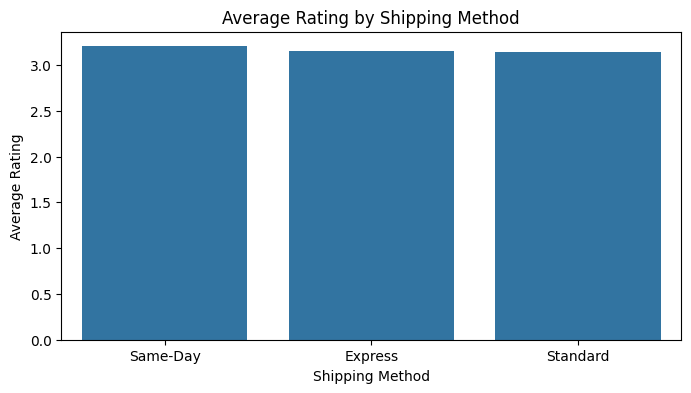

In [5]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=shipping_ratings.index,
    y=shipping_ratings['mean']
)
plt.title("Average Rating by Shipping Method")
plt.ylabel("Average Rating")
plt.xlabel("Shipping Method")
plt.show()

In [6]:
feedback_payment = pd.crosstab(
    df['Payment_Method'],
    df['Feedback'],
    normalize='index'
)

feedback_payment


Feedback,Average,Bad,Excellent,Good,No Feedback
Payment_Method,,,,,
Cash,0.194755,0.127054,0.307750,0.369855,0.000587
Credit Card,0.184212,0.129520,0.332636,0.353008,0.000624
Debit Card,0.230425,0.166908,0.337129,0.264889,0.000649
PayPal,0.226765,0.147977,0.359966,0.264613,0.000678
Unknown,0.227513,0.137566,0.407407,0.227513,0.000000


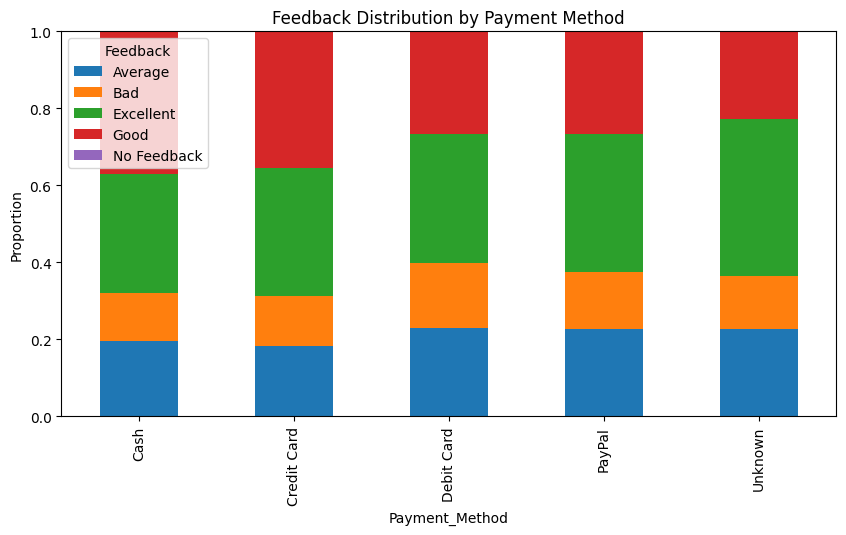

In [7]:
feedback_payment.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)
plt.title("Feedback Distribution by Payment Method")
plt.ylabel("Proportion")
plt.show()

In [8]:
status_ratings = (
    df.groupby('Order_Status')['Ratings']
      .agg(['mean','count'])
      .sort_values(by='mean')
)

status_ratings

,mean,count
Order_Status,,
Pending,3.060358,29557
Delivered,3.162299,78676
Shipped,3.176253,39154
Processing,3.246475,34677


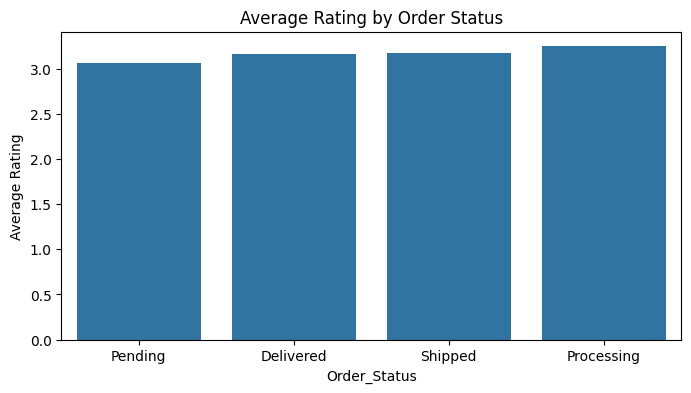

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=status_ratings.index,
    y=status_ratings['mean']
)
plt.title("Average Rating by Order Status")
plt.ylabel("Average Rating")
plt.show()

In [10]:
improvements = pd.DataFrame({
    "Issue": [
        "Low ratings for Standard Shipping",
        "Cash payment negative feedback",
        "Cancelled orders dissatisfaction"
    ],
    "Recommended Action": [
        "Promote faster shipping or improve logistics",
        "Encourage digital payments with incentives",
        "Improve inventory & order confirmation process"
    ]
})

improvements

,Issue,Recommended Action
0,Low ratings for Standard Shipping,Promote faster shipping or improve logistics
1,Cash payment negative feedback,Encourage digital payments with incentives
2,Cancelled orders dissatisfaction,Improve inventory & order confirmation process


In [11]:
improvements.to_csv("../outputs/phase_5_operational_recommendations.csv", index=False)